In [2]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision.utils import draw_bounding_boxes, make_grid
from dataset import ICPR2020

In [3]:
dt = ICPR2020('/data', split='train')
print(f'dataset length: {len(dt)}')
print(f'dataset classes: {dt.get_classes()}')

dataset length: 246
dataset classes: ['axis_title', 'chart_title', 'legend_label', 'legend_title', 'other', 'tick_grouping', 'tick_label', 'value_label', 'legend_patch', 'bar']


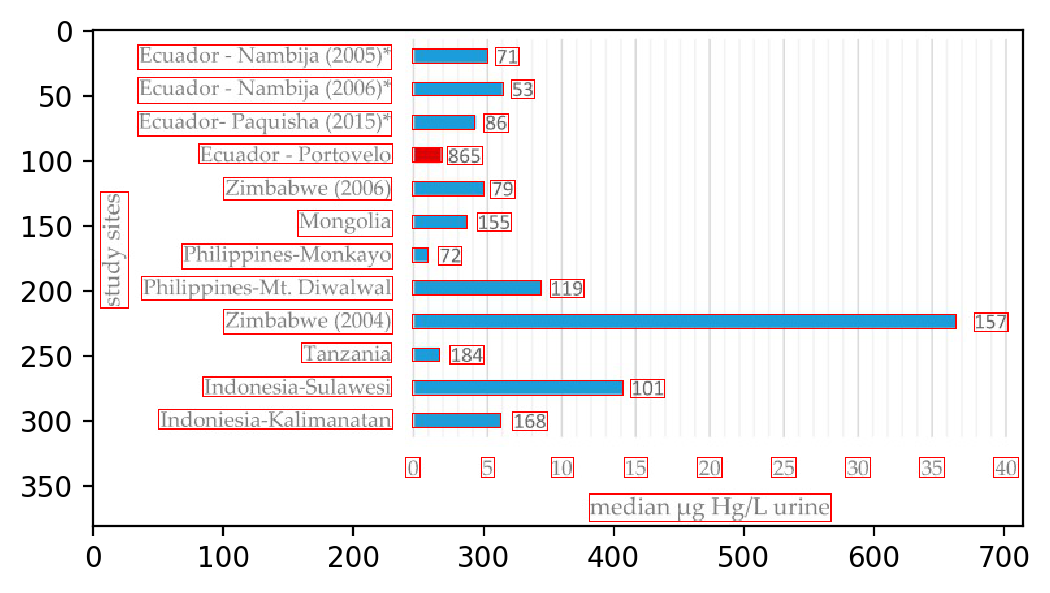

In [8]:
img, tgt = random.choice(dt)

t = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes()))
t = t.view(img.size[1], img.size[0], len(img.getbands()))
t = t.permute((2, 0, 1)).contiguous() # put it from HWC to CHW format
colors = ["red"] * tgt['boxes'].shape[0]

out = draw_bounding_boxes(t, boxes=tgt['boxes'], colors=colors)
out = make_grid([out])
out = out.numpy()
fig = plt.figure(dpi=200)
plt.imshow(np.transpose(out, (1,2,0)), interpolation='nearest')

In [23]:
from collections import Counter
c = Counter()
for img, tgt in dt:
    for l in tgt['labels']:
        c.update([int(l)])
print(c)        

Counter({10: 5164, 7: 4169, 8: 1273, 3: 452, 9: 452, 5: 219, 1: 192, 6: 31, 2: 9, 4: 4})
